In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the Dataset
data=pd.read_csv("data\Annotations_Metadata.csv")

In [3]:
data.head()

,file_id,user_id,subforum_id,num_contexts,label
0,12834217_1,572066,1346,0,noHate
1,12834217_2,572066,1346,0,noHate
2,12834217_3,572066,1346,0,noHate
3,12834217_4,572066,1346,0,hate
4,12834217_5,572066,1346,0,noHate


In [4]:
label_encoder=LabelEncoder()
data['label_encoded']=label_encoder.fit_transform(data['label'])

In [5]:
data.head()

,file_id,user_id,subforum_id,num_contexts,label,label_encoded
0,12834217_1,572066,1346,0,noHate,2
1,12834217_2,572066,1346,0,noHate,2
2,12834217_3,572066,1346,0,noHate,2
3,12834217_4,572066,1346,0,hate,0
4,12834217_5,572066,1346,0,noHate,2


In [6]:
# Group data by user_id to get counts and statistics
user_counts=data.groupby('user_id')['label_encoded'].agg(['count','mean','sum']).reset_index()
user_counts.columns=['user_id','total_contexts','hate_speech_propensity','total_hate_speech']

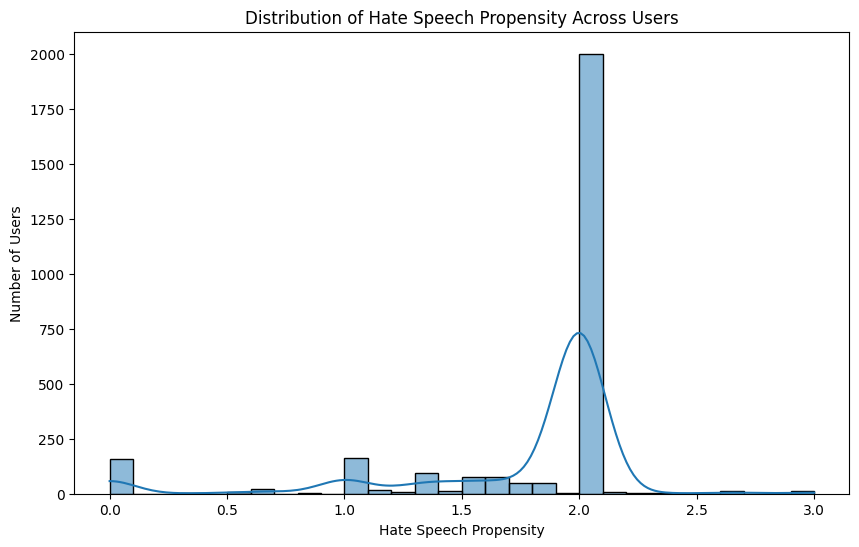

In [7]:
# Visualize user propensity distribution
plt.figure(figsize=(10, 6))
sns.histplot(user_counts['hate_speech_propensity'], bins=30, kde=True)
plt.title('Distribution of Hate Speech Propensity Across Users')
plt.xlabel('Hate Speech Propensity')
plt.ylabel('Number of Users')
plt.show()